# Example with the Bike Sharing dataset

The dataset stems from a kaggle competition and is available at [https://www.kaggle.com/c/bike-sharing-demand](https://www.kaggle.com/c/bike-sharing-demand).

In [1]:
import shapiq

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

### data

In [2]:
data = shapiq.load_bike()
X, y = data.drop("Count", axis=1).values, data.Count.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
n_features = X.shape[1]

### model

In [3]:
model = RandomForestRegressor(n_estimators=100, max_depth=3, max_features="sqrt", random_state=42)
model.fit(X_train, y_train)
print('Train R2: {:.4f}'.format(model.score(X_train, y_train)))
print('Val R2: {:.4f}'.format(model.score(X_test, y_test)))

Train R2: 0.8210
Val R2: 0.8203


### explain

In [4]:
explainer_tabular = shapiq.TabularExplainer(
    model=model.predict,
    data=X_train,
    random_state=42,
    index="SII",
    max_order=2,
    approximator="auto",
)

In [5]:
explainer_tree = shapiq.TreeExplainer(
    model=model,
    interaction_type="SII",
    max_order=2
)

In [6]:
x = X_test[1]

In [7]:
interaction_values_tabular = explainer_tabular.explain(x, budget=2**n_features)

In [8]:
interaction_values_tree = explainer_tree.explain(x)

/Users/hbaniecki/miniforge3/envs/shapiq/lib/python3.9/site-packages/shapiq/interaction_values.py:187: UserWarning: Adding InteractionValues with different interactions. Interactions will be merged and added together. The resulting InteractionValues will have the union of the interactions of the two original InteractionValues.
  warnings.warn(


### visualize

In [9]:
first_order_values = np.asarray([interaction_values_tabular[(i,)] for i in range(n_features)])
second_order_values = np.zeros((n_features, n_features))
for i in range(n_features):
    for j in range(n_features):
        if i == j:
            continue
        second_order_values[i, j] = interaction_values_tabular[(i, j)]

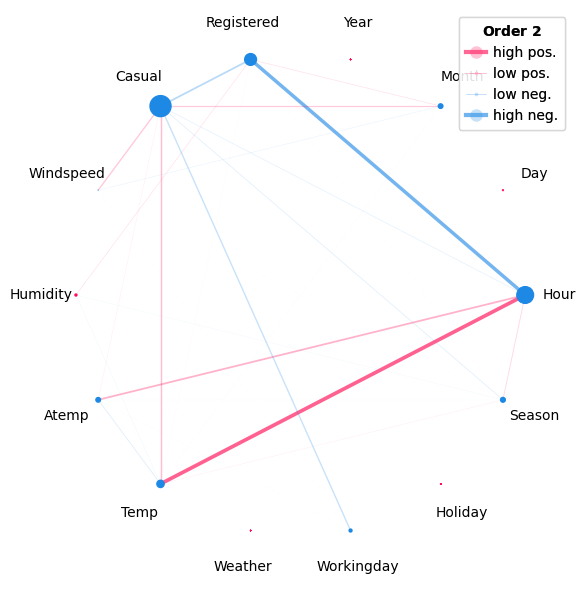

In [10]:
fig, axes = shapiq.network_plot(
    first_order_values=first_order_values,
    second_order_values=second_order_values,
    feature_names=data.drop("Count", axis=1).columns,
)
plt.tight_layout()
plt.show()

In [11]:
first_order_values = np.asarray([interaction_values_tree[(i,)] for i in range(n_features)])
second_order_values = np.zeros((n_features, n_features))
for i in range(n_features):
    for j in range(n_features):
        if i == j:
            continue
        second_order_values[i, j] = interaction_values_tree[(i, j)]

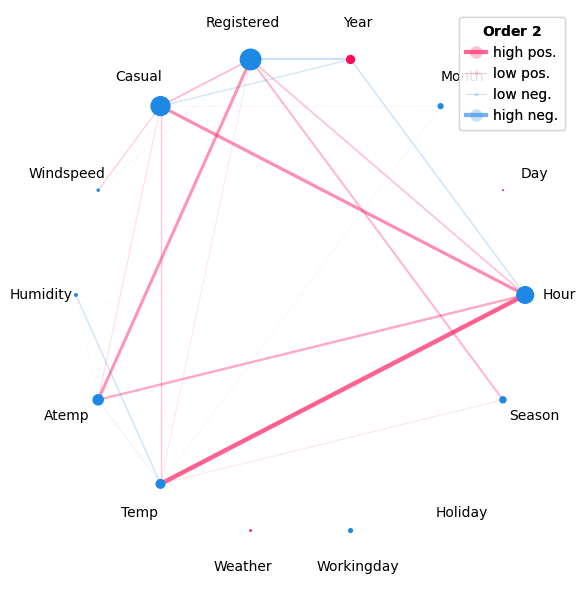

In [12]:
fig, axes = shapiq.network_plot(
    first_order_values=first_order_values,
    second_order_values=second_order_values,
    feature_names=data.drop("Count", axis=1).columns,
)
plt.tight_layout()
plt.show()